<a href="https://colab.research.google.com/github/dclocky/DL_ASSIGNMENTS/blob/main/Daryn_Loughlin_T00182938_DataDrivenModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

# **Stage 1**
***Describe Data***

A brief description of the data, where you sourced it, headers of the data. Summary statistics, charts etc...

If you using data from different sources how you might link them.

Link to the dataset being used:
https://www.kaggle.com/datasets/derekkunowilliams/mushrooms


Link to the google colab notebook that I started working on the project in:
https://colab.research.google.com/drive/19vmJl-LHLulf27xazP4AQRuHOSQVhcfB?usp=sharing


In [ ]:
! pip install kaggle
from google.colab import drive
drive.mount('/content/gdrive')
! mkdir ~/.kaggle
!cp /content/gdrive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json

Mounted at /content/gdrive


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d derekkunowilliams/mushrooms

 91% 68.0M/74.5M [00:00<00:00, 155MB/s]
100% 74.5M/74.5M [00:00<00:00, 140MB/s]


In [ ]:
!unzip mushrooms.zip

In [ ]:
import os
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# **Stage 2**

Justification for the property that you would like the model to predict.

I have reduced the dataset down to include only deadly mushrooms and deadly mushrooms to predict what can be a difficult thing for an inexperienced forager to do. A well trained Neural net should pick up on the differences and identify specific mushroom types and let the user know what will be fatal or something that is edible.

In [ ]:
Deadlydata, Edibledata,data = '/content/mushroom_dataset/deadly','/content/mushroom_dataset/edible','/content/mushroom_dataset'

# **Stage 3**

Cleaning the data, linking datasets etc..



In this step I have created the paths to the directories for just edible and deadly and I have omitted the conditionally edible and posionous mushrooms to make the module run quicker


In [ ]:
Edible_categories = os.listdir(Edibledata)
Deadly_categories = os.listdir(Deadlydata)

categories = Edible_categories + Deadly_categories

In [ ]:
categorie = categories[:100]
print("List of categories = ",categories)
image_size = (256, 256)
random_seed = 100

List of categories =  ['Hypsizygus_tessellatus', 'Agaricus_bisporus', 'Cyclocybe_aegerita', 'Calvatia_utriformis', 'Hygrophorus_chrysodon', 'Pseudohydnum_gelatinosum', 'Cortinarius_variicolor', 'Tuber_indicum', 'Suillus_luteus', 'Armillaria_mellea', 'Lactarius_deterrimus', 'Craterellus_tubaeformis', 'Hericium_erinaceus', 'Hydnum_repandum', 'Auricularia_auricula-judae', 'Coprinus_comatus', 'Marasmius_oreades', 'Tuber_aestivum', 'Tuber_borchii', 'Leccinum_aurantiacum', 'Calbovista_subsculpta', 'Tuber_macrosporum', 'Grifola_frondosa', 'Sparassis_crispa', 'Tuber_mesentericum', 'Stropharia_rugosoannulata', 'Clitocybe_nuda', 'Agaricus_arvensis', 'Amanita_caesarea', 'Aleuria_aurantia', 'Clavariaceae', 'Lactarius_salmonicolor', 'Suillus_granulatus', 'Polyporus_squamosus', 'Flammulina_velutipes', 'Tremella_fuciformis', 'Agaricus_silvaticus', 'Clavulinaceae', 'Pleurotus', 'Tuber_brumale', 'Rhizopogon_luteolus', 'Tricholoma_terreum', 'Leccinum_versipelle', 'Cyttaria_espinosae', 'Lactarius_volemus

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)

data_generator = train_datagen.flow_from_directory(data, target_size=(256, 256),classes = ['deadly','edible'], class_mode='binary') # add edible class

Found 3665 images belonging to 2 classes.


In [ ]:
img_size = (256, 256)
batch_size = 64

train_generator = train_datagen.flow_from_directory(data,target_size=img_size,batch_size=batch_size,class_mode='binary',classes = ['deadly','edible'])# add edible class back

Found 3665 images belonging to 2 classes.


In [ ]:
image_size = img_size = (256, 256)

i = 0

X_batches = []
Y_batches = []

for images, labels in data_generator:
    X_batches.append(images)
    Y_batches.append(labels)
    if (len(X_batches) * data_generator.batch_size) >= data_generator.n:
        break

X_train = np.concatenate(X_batches, axis=0)
Y_train = np.concatenate(Y_batches, axis=0)





In [ ]:
X_train = X_train//2
Y_train = Y_train//2

In [ ]:
import matplotlib.pyplot as plt

images = np.array(images)
labels = np.array(labels)

def display_random_images(image_data_generator,class_mapping, num_images=9):
    image_data_generator_iter = iter(image_data_generator)
    images = next(image_data_generator_iter)
    folder_names = next(image_data_generator_iter)
    folder_names_list = [folder[0] for folder in folder_names]
    #labels = [class_mapping[np.argmax(label)] for label in folder_names_list]

    plt.figure(figsize=(19, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i+1)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        plt.imshow(images[i])

        plt.title('Mushroom type: {}'.format(class_name))
        plt.xticks([])
        plt.yticks([])
        plt.show()

class_mapping = {}
for class_name, class_index in train_generator.class_indices.items():
  class_mapping[class_index] = class_name

# **Stage 4**
Choose and train Estimator.

In [ ]:
from keras.models import Sequential,Model as keras
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_batches, Y_batches, test_size = 0.2, random_state = random_seed)


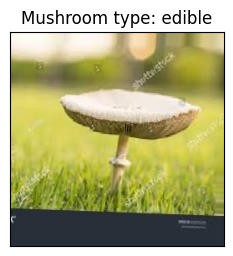

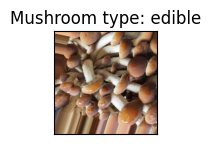

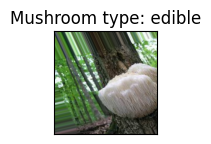

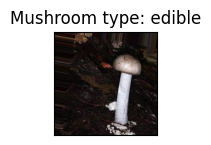

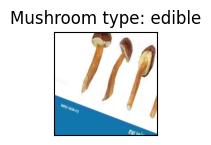

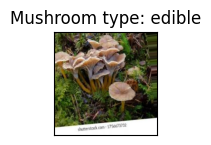

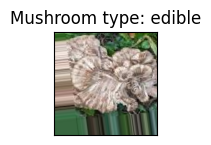

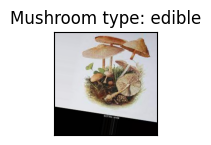

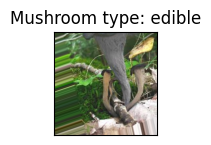

In [ ]:
display_random_images(x_train,y_train)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.build((None, 256, 256, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# **Stage 5**
Evaluate your model and revisit 4...repeat..

In [ ]:
X_test = np.concatenate(x_test, axis=0)
Y_test = np.concatenate(y_test, axis=0)

X_test = X_test//4
Y_test = Y_test//4


In [ ]:
model.fit(X_train, Y_train, epochs=5) # Epochs was 10 but reduced to 5 because that is where accuracy starts to drop

Epoch 1/5
115/115 [==============================] - 491s 4s/step - loss: 0.1217 - accuracy: 1.0000
Epoch 2/5
115/115 [==============================] - 483s 4s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 3/5
115/115 [==============================] - 483s 4s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 4/5
115/115 [==============================] - 484s 4s/step - loss: 5.5015e-04 - accuracy: 1.0000
Epoch 5/5
115/115 [==============================] - 483s 4s/step - loss: 3.4902e-04 - accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

print(loss,accuracy)

23/23 [==============================] - 24s 1s/step - loss: 2.8508e-04 - accuracy: 1.0000
0.0002850825258065015 1.0


In [ ]:
X_train.shape

(3665, 256, 256, 3)

In [ ]:

pred = model.predict(X_test)

pred.shape

23/23 [==============================] - 23s 1s/step


(736, 1)

# **Stage 6**
***Present results and Conclusions***



The model is over trained with higher Epochs than 5, but it is predicting if a mushroom is edible or deadly after eating.

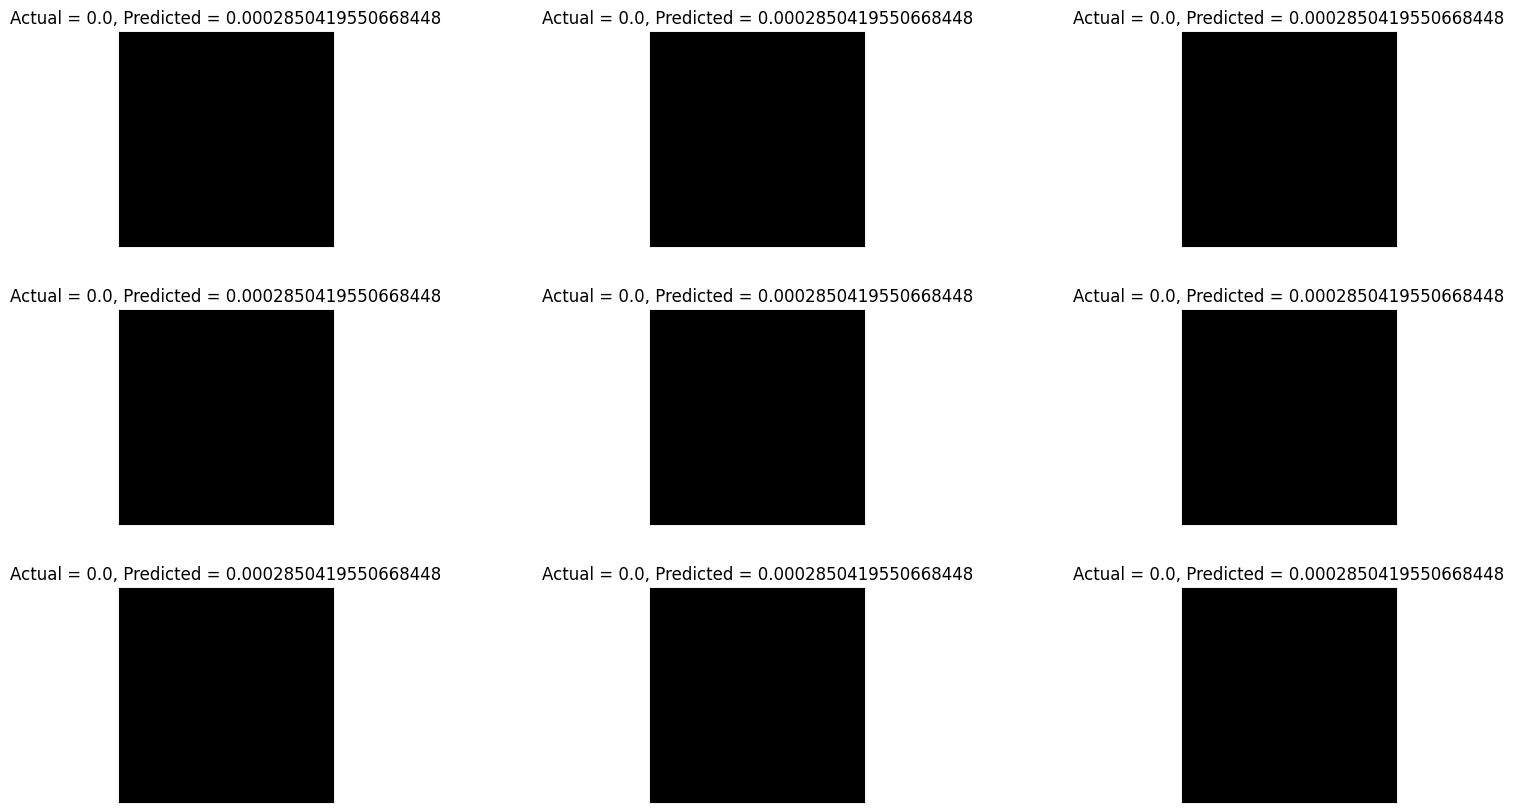

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint(0, X_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(X_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(Y_test[r[0]], pred[r[0]][0]))
    plt.xticks([]) , plt.yticks([])

plt.show()